In [1]:
# Import de las librerías necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Exploratory Data Analysis

In [2]:
# Load the dataset of fraudulent jobs
data = pd.read_csv('data/fake_job_postings.csv')
print(data.shape)
data.head()

(17880, 18)


,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
# Insert description of the variables

In [4]:
# Data Types
data.dtypes

job_id                  int64
title                  object
location               object
department             object
salary_range           object
company_profile        object
description            object
requirements           object
benefits               object
telecommuting           int64
has_company_logo        int64
has_questions           int64
employment_type        object
required_experience    object
required_education     object
industry               object
function               object
fraudulent              int64
dtype: object

In [5]:
# Describe numerical values

data.describe() #It does not show any significant information due the values being binary (0,1)

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
# Distribution of the main variable: 
# Fraudulent == 1 --> True 
data.fraudulent.value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [7]:
# % of Null Values of Fraudulent

data[data['fraudulent'] == 1].isnull().sum() / (data[data['fraudulent'] == 1].shape[0])

job_id                 0.000000
title                  0.000000
location               0.021940
department             0.613164
salary_range           0.742494
company_profile        0.677829
description            0.001155
requirements           0.177829
benefits               0.420323
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
employment_type        0.278291
required_experience    0.502309
required_education     0.520785
industry               0.317552
function               0.389145
fraudulent             0.000000
dtype: float64

In [8]:
# % of Null Values for Non Fraudulent
data[data['fraudulent'] == 0].isnull().sum() / (data[data['fraudulent'] == 0].shape[0])

job_id                 0.000000
title                  0.000000
location               0.019219
department             0.647467
salary_range           0.844540
company_profile        0.159927
description            0.000000
requirements           0.149348
benefits               0.402375
telecommuting          0.000000
has_company_logo       0.000000
has_questions          0.000000
employment_type        0.189844
required_experience    0.388797
required_education     0.449865
industry               0.272011
function               0.359586
fraudulent             0.000000
dtype: float64

### Duplicated values

In [9]:
# Check if there are duplicated values

data.duplicated().value_counts()

False    17880
dtype: int64

In [10]:
# Check if there are duplicated values in offer columns (company_profile, description, requirements, benefits)
offer_columns = ['company_profile', 'description', 'requirements', 'benefits']

# Seems that there are information duplicated in the columns
data[offer_columns].duplicated().value_counts()

False    15474
True      2406
dtype: int64

In [11]:
# Distribution in duplicated info by fraudulent
print('Fraudulent')
print(data[offer_columns][data['fraudulent']==1].duplicated().value_counts())
print('----')
print('Non Fradulent')
print(data[offer_columns][data['fraudulent']==0].duplicated().value_counts())

Fraudulent
False    684
True     182
dtype: int64
----
Non Fradulent
False    14790
True      2224
dtype: int64


In [12]:
# Check unique values for each column

def check_unique(df):
    '''
    This function takes a dataframe and print the list of all unique values for each column
    '''   
    for column in df.columns:
        print(f'The unique values of column {column} are: {df[column].unique()}')
        print('\n')
        
check_unique(data)

The unique values of column job_id are: [    1     2     3 ... 17878 17879 17880]


The unique values of column title are: ['Marketing Intern' 'Customer Service - Cloud Video Production'
 'Commissioning Machinery Assistant (CMA)' ...
 'Senior Financial Analyst (Retail) ' 'Account Director - Distribution '
 'Project Cost Control Staff Engineer - Cost Control Exp - TX']


The unique values of column location are: ['US, NY, New York' 'NZ, , Auckland' 'US, IA, Wever' ...
 'US, CA, los Angeles' 'CA, , Ottawa' 'GB, WSX, Chichester']


The unique values of column department are: ['Marketing' 'Success' nan ... 'Admin - Clerical' 'Administrative Dept'
 'Hospitality']


The unique values of column salary_range are: [nan '20000-28000' '100000-120000' '120000-150000' '50000-65000'
 '40000-50000' '60-80' '65000-70000' '75-115' '75000-110000' '17000-20000'
 '16000-28000' '95000-115000' '15000-18000' '50000-70000' '45000-60000'
 '30000-40000' '70000-90000' '10000-14000' '50-110' '28000-45000'
 '0-343

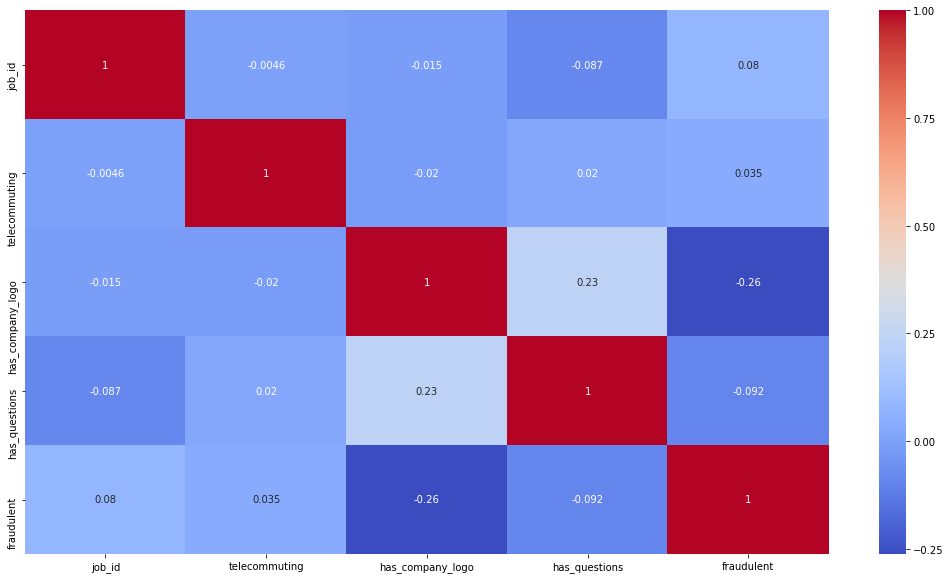

In [13]:
### See correlation between variables

plt.figure(figsize=(18,10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

## Cleaning

In [14]:
# Split of localitation column

# new data frame with split value columns 
new = data["location"].str.split(",", n = 2, expand = True) 
  
# making separate columns from new data frame 
data["Country"]= new[0] 
data["Region"]= new[1]
data["City"] = new[2]

data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,Country,Region,City
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,0,Other,Internship,NaN,NaN,Marketing,0,US,NY,New York
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,,Auckland
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,US,IA,Wever
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth


In [15]:
## Trial to extract the Bag of words
## Merge offer columns of text into one (it should be cleaned taking into account duplicated values)

data['transcript'] = data[offer_columns].apply(lambda row: ''.join(row.values.astype(str)), axis=1)


## Bag Of Words
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(data['transcript'])
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm

### Additional cleaning of text has to be made...


,00,000,0000,0001pt,0005,000a,000aed,000annual,000apply,000applying,...,확보했습니다,확장을,활용해,회계,회계관리,회사,회사의,ﬁber,ﬁnd,ﬂexible
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
## TOP WORDS FOR FRAUDULENT

# Selecting the index of Fraudulent
fraudulent_index = data[data['fraudulent'] == 1].index

In [44]:
# Find the top 25 words of each fraudulent offer:
# It takes some time...

# I have to check it but it does not seem good
top_fraudulent_words_dict = {}

for column in data_dtm:
    top = data_dtm[column].iloc[fraudulent_index,].sort_values(ascending=False).head(25)
    top_fraudulent_words_dict[column] = list(zip(data_dtm.columns.get_values()[top.index], top.values))


C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The 'get_values' method is deprecated and will be removed in a future version. Use '.to_numpy()' or '.array' instead.
  


In [45]:
top_fraudulent_words = pd.DataFrame(top_fraudulent_words_dict)
top_fraudulent_words.head()

,00,000,0000,0001pt,0005,000a,000aed,000annual,000apply,000applying,...,확보했습니다,확장을,활용해,회계,회계관리,회사,회사의,ﬁber,ﬁnd,ﬂexible
0,"(colorsideal, 15)","(colorsideal, 6)","(commitmentexcellent, 0)","(collectionparticipates, 2)","(commitmentexcellent, 0)","(commitmentexcellent, 0)","(commitmentexcellent, 0)","(commitmentexcellent, 0)","(commitmentexcellent, 0)","(commitmentexcellent, 0)",...,"(commitmentexcellent, 0)","(commitmentexcellent, 0)","(commitmentexcellent, 0)","(commitmentexcellent, 0)","(commitmentexcellent, 0)","(commitmentexcellent, 0)","(commitmentexcellent, 0)","(commitmentexcellent, 0)","(commitmentexcellent, 0)","(commitmentexcellent, 0)"
1,"(commercewhat, 4)","(blogosphere, 4)","(applications1, 0)","(commented, 1)","(applications1, 0)","(applications1, 0)","(applications1, 0)","(applications1, 0)","(applications1, 0)","(applications1, 0)",...,"(applications1, 0)","(applications1, 0)","(applications1, 0)","(applications1, 0)","(applications1, 0)","(applications1, 0)","(applications1, 0)","(applications1, 0)","(applications1, 0)","(applications1, 0)"
2,"(collectively, 3)","(brandsensure, 4)","(applicationscold, 0)","(commerceminimum, 1)","(applicationscold, 0)","(applicationscold, 0)","(applicationscold, 0)","(applicationscold, 0)","(applicationscold, 0)","(applicationscold, 0)",...,"(applicationscold, 0)","(applicationscold, 0)","(applicationscold, 0)","(applicationscold, 0)","(applicationscold, 0)","(applicationscold, 0)","(applicationscold, 0)","(applicationscold, 0)","(applicationscold, 0)","(applicationscold, 0)"
3,"(commissionhealth, 2)","(60, 3)","(applicationscloud, 0)","(commitmentexcellent, 0)","(applicationscloud, 0)","(applicationscloud, 0)","(applicationscloud, 0)","(applicationscloud, 0)","(applicationscloud, 0)","(applicationscloud, 0)",...,"(applicationscloud, 0)","(applicationscloud, 0)","(applicationscloud, 0)","(applicationscloud, 0)","(applicationscloud, 0)","(applicationscloud, 0)","(applicationscloud, 0)","(applicationscloud, 0)","(applicationscloud, 0)","(applicationscloud, 0)"
4,"(colleaguesdesirabledegree, 2)","(applicationscold, 3)","(applicationsbuild, 0)","(applicationproficient, 0)","(applicationsbuild, 0)","(applicationsbuild, 0)","(applicationsbuild, 0)","(applicationsbuild, 0)","(applicationsbuild, 0)","(applicationsbuild, 0)",...,"(applicationsbuild, 0)","(applicationsbuild, 0)","(applicationsbuild, 0)","(applicationsbuild, 0)","(applicationsbuild, 0)","(applicationsbuild, 0)","(applicationsbuild, 0)","(applicationsbuild, 0)","(applicationsbuild, 0)","(applicationsbuild, 0)"


## Prediction Models

In [ ]:
## We should try with other ML algorithms like KNN, Decission Trees...

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
# Cargamos el modelo de Regresion Logistica
lr = LogisticRegression()

In [19]:
data = data.fillna('0')

In [20]:
data.isnull().sum()

job_id                 0
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
Country                0
Region                 0
City                   0
transcript             0
dtype: int64

In [21]:
# Split dataset in train/split
data =  data[['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']]
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns='fraudulent'), data['fraudulent'], test_size=0.2, random_state=42)

In [22]:
lr.fit(x_train, y_train)

C:\Users\unoma\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
lr.score(x_test, y_test) #balancear

0.9493847874720358

In [24]:
predict = lr.predict(x_test)

In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predict) #especifidad --> preferencia en indentificar los fraudes correctamente (minimizar los falsos positivos)

array([[3395,    0],
       [ 181,    0]], dtype=int64)

In [26]:
# Conclusion Natural Language Processing

In [27]:
y_train.head()

2112     0
7571     0
764      0
17291    0
16069    0
Name: fraudulent, dtype: int64